In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

<p>Generate 20 data points.</p>

In [ ]:
x = torch.Tensor(np.random.uniform(0, 1, 20))
n = torch.Tensor(np.random.normal(0, 1, 20))
y = torch.Tensor(np.sin(2*np.pi*x) + 0.1*n)

<p>Split into 10 train and 10 test data points. </p>

In [ ]:
train_x = x[:10]
train_y = y[:10]

test_x = x[10:]
test_y = y[10:]

<p>Define our models: zero order, first order, third order, and ninth order regression. </p>

In [ ]:
class ZeroOrder(torch.nn.Module):
  def __init__(self):
    self.w0 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.total_loss = 0
  
  def forward(self, x):
    return self.w0
  
  def loss(self, x, y):
    y_pred = self.forward(x)
    return (y_pred - y) * (y_pred - y)

  def train(self, epochs, train_x, train_y):
    for epoch in range(epochs):
      self.total_loss = 0
      for x_val, y_val in zip(train_x, train_y):
        l = self.loss(x_val, y_val)
        self.total_loss += l.data.numpy()
        l.backward()

        self.w0.data = self.w0.data - 0.01*self.w0.grad.data
        self.w0.grad.data.zero_()
      self.total_loss = np.sqrt(self.total_loss/len(train_x))
      #print("training progress: ", epoch, self.total_loss.data[0])

In [ ]:
class FirstOrder(torch.nn.Module):
  def __init__(self):
    self.w0 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w1 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.total_loss = 0
  
  def forward(self, x):
    return self.w1*x + self.w0
  
  def loss(self, x, y):
    y_pred = self.forward(x)
    return (y_pred - y) * (y_pred - y)

  def train(self, epochs, train_x, train_y):
    for epoch in range(epochs):
      self.total_loss = 0
      for x_val, y_val in zip(train_x, train_y):
        l = self.loss(x_val, y_val)
        self.total_loss += l.data.numpy()
        l.backward()

        self.w0.data = self.w0.data - 0.01*self.w0.grad.data
        self.w1.data = self.w1.data - 0.01*self.w1.grad.data
        self.w0.grad.data.zero_()
        self.w1.grad.data.zero_()
      
      self.total_loss = np.sqrt(self.total_loss/len(train_x))
      #print("training progress: ", epoch, self.total_loss.data[0])

In [ ]:
class ThirdOrder(torch.nn.Module):
  def __init__(self):
    self.w0 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w1 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w2 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w3 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.total_loss = 0
  
  def forward(self, x):
    return self.w3*x*x*x + self.w2*x*x + self.w1*x + self.w0
  
  def loss(self, x, y):
    y_pred = self.forward(x)
    return (y_pred - y) * (y_pred - y)

  def train(self, epochs, train_x, train_y):
    for epoch in range(epochs):
      self.total_loss = 0
      for x_val, y_val in zip(train_x, train_y):
        l = self.loss(x_val, y_val)
        self.total_loss += l.data.numpy()
        l.backward()

        self.w0.data = self.w0.data - 0.01*self.w0.grad.data
        self.w1.data = self.w1.data - 0.01*self.w1.grad.data
        self.w2.data = self.w2.data - 0.01*self.w2.grad.data
        self.w3.data = self.w3.data - 0.01*self.w3.grad.data
        self.w0.grad.data.zero_()
        self.w1.grad.data.zero_()
        self.w2.grad.data.zero_()
        self.w3.grad.data.zero_()

      self.total_loss = np.sqrt(self.total_loss/len(train_x))
      #print("training progress: ", epoch, self.total_loss.data[0])

In [ ]:
class NinthOrder(torch.nn.Module):
  def __init__(self):
    self.w0 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w1 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w2 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w3 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w4 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w5 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w6 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w7 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w8 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w9 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.total_loss = 0
  
  def forward(self, x):
    return self.w9*x**9 + self.w8*x**8 + self.w7*x**7 + self.w6*x**6 + self.w5*x**5 + self.w4*x**4 + self.w3*x**3 + self.w2*x*x + self.w1*x + self.w0
  
  def loss(self, x, y):
    y_pred = self.forward(x)
    return (y_pred - y) * (y_pred - y)

  def train(self, epochs, train_x, train_y):
    for epoch in range(epochs):
      self.total_loss = 0
      for x_val, y_val in zip(train_x, train_y):
        l = self.loss(x_val, y_val)
        self.total_loss += l.data.numpy()
        l.backward()

        self.w0.data = self.w0.data - 0.01*self.w0.grad.data
        self.w1.data = self.w1.data - 0.01*self.w1.grad.data
        self.w2.data = self.w2.data - 0.01*self.w2.grad.data
        self.w3.data = self.w3.data - 0.01*self.w3.grad.data
        self.w4.data = self.w4.data - 0.01*self.w4.grad.data
        self.w5.data = self.w5.data - 0.01*self.w5.grad.data
        self.w6.data = self.w6.data - 0.01*self.w6.grad.data
        self.w7.data = self.w7.data - 0.01*self.w7.grad.data
        self.w8.data = self.w8.data - 0.01*self.w8.grad.data
        self.w9.data = self.w9.data - 0.01*self.w9.grad.data
        self.w0.grad.data.zero_()
        self.w1.grad.data.zero_()
        self.w2.grad.data.zero_()
        self.w3.grad.data.zero_()
        self.w4.grad.data.zero_()
        self.w5.grad.data.zero_()
        self.w6.grad.data.zero_()
        self.w7.grad.data.zero_()
        self.w8.grad.data.zero_()
        self.w9.grad.data.zero_()
      
      self.total_loss = np.sqrt(self.total_loss/len(train_x))
      #print("training progress: ", epoch, self.total_loss.data[0])

<p>Now we train our models. </p>

In [ ]:
train_losses = []
zero_model = ZeroOrder()
first_model = FirstOrder()
third_model = ThirdOrder()
ninth_model = NinthOrder()

In [ ]:
zero_model.train(100, train_x, train_y)
print("Train Loss:", zero_model.total_loss)
train_losses.append(zero_model.total_loss)

Train Loss: [0.7056702]


In [ ]:
first_model.train(100, train_x, train_y)
print("Train Loss:", first_model.total_loss)
train_losses.append(first_model.total_loss)

Train Loss: [0.35923412]


In [ ]:
third_model.train(100, train_x, train_y)
print("Train Loss:", third_model.total_loss)
train_losses.append(third_model.total_loss)

Train Loss: [0.2794638]


In [ ]:
ninth_model.train(100, train_x, train_y)
print("Train Loss:", ninth_model.total_loss)
train_losses.append(ninth_model.total_loss)

Train Loss: [0.24995211]


<p>Visualize the results, starting with the zero order model. </p>

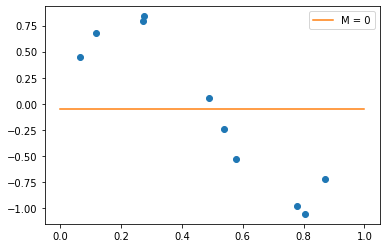

In [ ]:
def visualize(model, train_x, train_y, mstr):
  X = np.linspace(0,1,100)
  preds = []
  for x in X:
    preds.append(model.forward(x).detach())

  plt.plot(train_x, train_y, 'o')
  plt.plot(X, preds, label=mstr)
  plt.legend()
  plt.show()

visualize(zero_model, train_x, train_y, "M = 0")

<p>Next, generate predictions with the model on the test data set and calculate the mean squared error. </p>

In [ ]:
test_losses = []
def test_loss(model):
  test_preds = []
  test_loss = 0
  for i in range(len(test_x)):
    test_preds.append(model.forward(test_x[i]).detach())
    test_loss += (test_preds[i] - test_y[i])*(test_preds[i] - test_y[i])
  test_loss = np.sqrt(test_loss.detach().numpy()/len(test_x))
  print("Test Loss:", test_loss)
  
  return test_loss
  
test_losses.append(test_loss(zero_model))

Test Loss: [0.6712817]


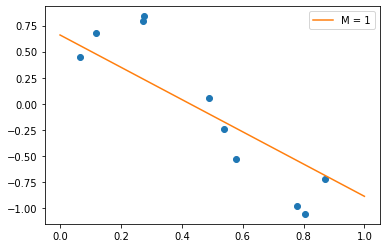

In [ ]:
visualize(first_model, train_x, train_y, "M = 1")

In [ ]:
test_losses.append(test_loss(first_model))

Test Loss: [0.40543154]


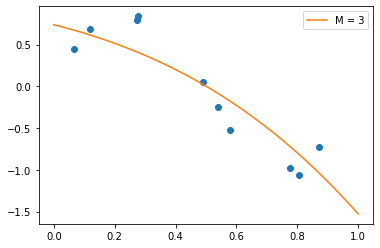

In [ ]:
visualize(third_model, train_x, train_y, "M = 3")

In [ ]:
test_losses.append(test_loss(third_model))

Test Loss: [0.33721173]


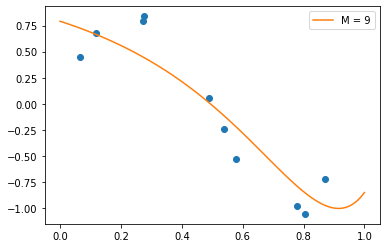

In [ ]:
visualize(ninth_model, train_x, train_y, "M = 9")

In [ ]:
test_losses.append(test_loss(ninth_model))

Test Loss: [0.30717623]


In [ ]:
val3 = [["" for c in range(4)] for r in range(10)]
val3[0][0] = zero_model.w0.detach().numpy()
val3[0][1] = first_model.w0.detach().numpy()
val3[0][2] = third_model.w0.detach().numpy()
val3[0][3] = ninth_model.w0.detach().numpy()

val3[1][1] = first_model.w1.detach().numpy()
val3[1][2] = third_model.w1.detach().numpy()
val3[1][3] = ninth_model.w1.detach().numpy()

val3[2][2] = third_model.w2.detach().numpy()
val3[2][3] = ninth_model.w2.detach().numpy()

val3[3][2] = third_model.w3.detach().numpy()
val3[3][3] = ninth_model.w3.detach().numpy()

val3[4][3] = ninth_model.w4.detach().numpy()
val3[5][3] = ninth_model.w5.detach().numpy()
val3[6][3] = ninth_model.w6.detach().numpy()
val3[7][3] = ninth_model.w7.detach().numpy()
val3[8][3] = ninth_model.w8.detach().numpy()
val3[9][3] = ninth_model.w9.detach().numpy()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


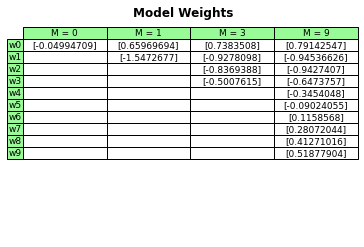

In [ ]:
#https://www.pythonpool.com/matplotlib-table/
val1 = ["M = 0", "M = 1", "M = 3", "M = 9"] 
val2 = ["w0", "w1", "w2", "w3", "w4", "w5", "w6", "w7", "w8", "w9"] 
 
   
fig, ax = plt.subplots() 
ax.set_axis_off() 
table = ax.table( 
    cellText = val3,  
    rowLabels = val2,  
    colLabels = val1, 
    rowColours =["palegreen"] * 10,  
    colColours =["palegreen"] * 4, 
    cellLoc ='center',  
    loc ='upper left')         
   
ax.set_title('Model Weights', 
             fontweight ="bold") 
   
plt.show() 

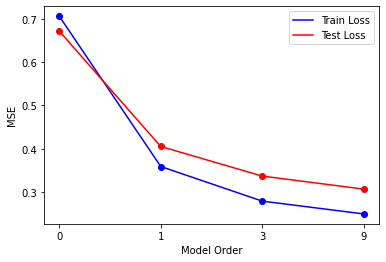

In [ ]:
x_vals = ["0","1","3","9"]
plt.plot(x_vals, train_losses, label='Train Loss', color="blue")
plt.plot(x_vals, train_losses, 'o', color="blue")
plt.plot(x_vals, test_losses, label="Test Loss", color="red")
plt.plot(x_vals, test_losses, 'o', color="red")
plt.xlabel("Model Order")
plt.ylabel("MSE")
plt.legend()
plt.show()

<p>Generate 100 more data points and fit the 9th order model. </p>

In [ ]:
x_large = torch.Tensor(np.random.uniform(0, 1, 100))
n_large = torch.Tensor(np.random.normal(0, 1, 100))
y_large = torch.Tensor(np.sin(2*np.pi*x_large) + 0.1*n_large)

train_x_large = x_large
train_y_large = y_large

In [ ]:
model = NinthOrder()
model.train(100, train_x_large, train_y_large)

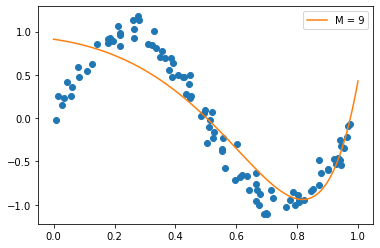

In [ ]:
visualize(model, train_x_large, train_y_large, "M = 9")

<p>Now view the effects of regularization. Redefine the 9th order model with a regularized loss function. </p>

In [47]:
class NinthOrder(torch.nn.Module):
  def __init__(self):
    self.w0 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w1 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w2 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w3 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w4 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w5 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w6 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w7 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w8 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w9 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.total_loss = 0
    self.ld = 1
  
  def forward(self, x):
    return self.w9*x**9 + self.w8*x**8 + self.w7*x**7 + self.w6*x**6 + self.w5*x**5 + self.w4*x**4 + self.w3*x**3 + self.w2*x*x + self.w1*x + self.w0
  
  def loss(self, x, y):
    y_pred = self.forward(x)
    return (y_pred - y) * (y_pred - y) + self.ld*(self.w0.data**2 + self.w1.data**2 + self.w2.data**2 + self.w3.data**2 + 
                                             self.w4.data**2 + self.w5.data**2 + self.w6.data**2 + self.w7.data**2 + 
                                             self.w8.data**2 + self.w9.data**2)

  def train(self, epochs, train_x, train_y):
    for epoch in range(epochs):
      self.total_loss = 0
      for x_val, y_val in zip(train_x, train_y):
        l = self.loss(x_val, y_val)
        self.total_loss += l.data.numpy()
        l.backward()

        self.w0.data = self.w0.data - 0.01*self.w0.grad.data
        self.w1.data = self.w1.data - 0.01*self.w1.grad.data
        self.w2.data = self.w2.data - 0.01*self.w2.grad.data
        self.w3.data = self.w3.data - 0.01*self.w3.grad.data
        self.w4.data = self.w4.data - 0.01*self.w4.grad.data
        self.w5.data = self.w5.data - 0.01*self.w5.grad.data
        self.w6.data = self.w6.data - 0.01*self.w6.grad.data
        self.w7.data = self.w7.data - 0.01*self.w7.grad.data
        self.w8.data = self.w8.data - 0.01*self.w8.grad.data
        self.w9.data = self.w9.data - 0.01*self.w9.grad.data
        self.w0.grad.data.zero_()
        self.w1.grad.data.zero_()
        self.w2.grad.data.zero_()
        self.w3.grad.data.zero_()
        self.w4.grad.data.zero_()
        self.w5.grad.data.zero_()
        self.w6.grad.data.zero_()
        self.w7.grad.data.zero_()
        self.w8.grad.data.zero_()
        self.w9.grad.data.zero_()
      
      self.total_loss = np.sqrt(self.total_loss/len(train_x))
      #print("training progress: ", epoch, self.total_loss.data[0])

<p>Lambda = 1 </p>

In [48]:
ld_train_loss = []
model = NinthOrder()
model.ld = 1
model.train(100, train_x, train_y)
ld_train_loss.append(model.total_loss)

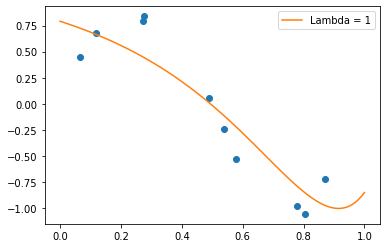

In [49]:
visualize(model, train_x, train_y, "Lambda = 1")

In [50]:
ld_test_losses = []
def ld_test_loss(model):
  test_preds = []
  test_loss = 0
  for i in range(len(test_x)):
    test_preds.append(model.forward(test_x[i]).detach())
    test_loss += (test_preds[i] - test_y[i])*(test_preds[i] - test_y[i]) + model.ld*(model.w0.data**2 + model.w1.data**2 + model.w2.data**2 + model.w3.data**2 + 
                                             model.w4.data**2 + model.w5.data**2 + model.w6.data**2 + model.w7.data**2 + 
                                             model.w8.data**2 + model.w9.data**2)
  test_loss = np.sqrt(test_loss.detach().numpy()/len(test_x))
  print("Test Loss:", test_loss)
  
  return test_loss

ld_test_losses.append(ld_test_loss(model))

Test Loss: [1.892464]


<p>Lambda = 1/10 </p>

In [51]:
model = NinthOrder()
model.ld = 1/10
model.train(100, train_x, train_y)
ld_train_loss.append(model.total_loss)

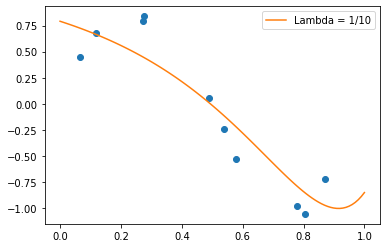

In [52]:
visualize(model, train_x, train_y, "Lambda = 1/10")

In [53]:
ld_test_losses.append(ld_test_loss(model))

Test Loss: [0.6656302]


<p>Lambda = 1/100 </p>

In [54]:
model = NinthOrder()
model.ld = 1/100
model.train(100, train_x, train_y)
ld_train_loss.append(model.total_loss)

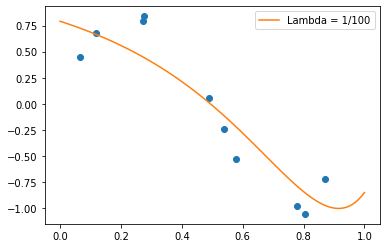

In [55]:
visualize(model, train_x, train_y, "Lambda = 1/100")

In [56]:
ld_test_losses.append(ld_test_loss(model))

Test Loss: [0.35948277]


<p>Lambda = 1/1000 </p>

In [57]:
model = NinthOrder()
model.ld = 1/1000
model.train(100, train_x, train_y)
ld_train_loss.append(model.total_loss)

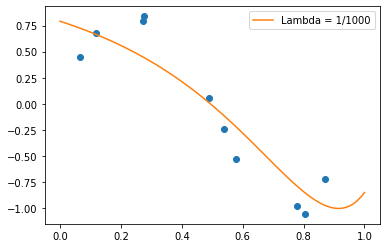

In [58]:
visualize(model, train_x, train_y, "Lambda = 1/1000")

In [59]:
ld_test_losses.append(ld_test_loss(model))

Test Loss: [0.31280077]


<p>Lambda = 1/10000 </p>

In [60]:
model = NinthOrder()
model.ld = 1/10000
model.train(100, train_x, train_y)
ld_train_loss.append(model.total_loss)

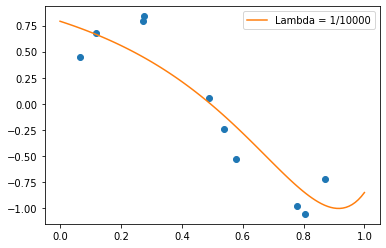

In [61]:
visualize(model, train_x, train_y, "Lambda = 1/10000")

In [62]:
ld_test_losses.append(ld_test_loss(model))

Test Loss: [0.3077433]


<p>Lambda = 1/100000 </p>

In [63]:
model = NinthOrder()
model.ld = 1/100000
model.train(100, train_x, train_y)
ld_train_loss.append(model.total_loss)

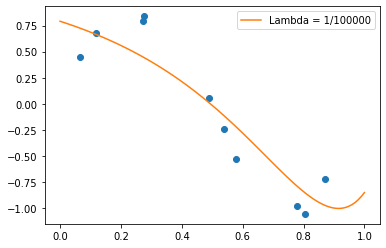

In [64]:
visualize(model, train_x, train_y, "Lambda = 1/100000")

In [65]:
ld_test_losses.append(ld_test_loss(model))

Test Loss: [0.307233]


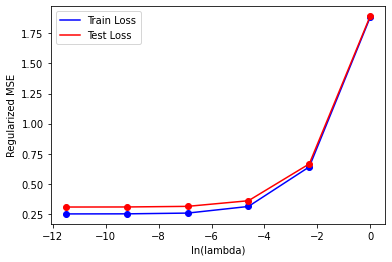

In [66]:
x_vals = [np.log(1), np.log(1/10), np.log(1/100), np.log(1/1000), np.log(1/10000), np.log(1/100000)]
plt.plot(x_vals, ld_train_loss, label='Train Loss', color="blue")
plt.plot(x_vals, ld_train_loss, 'o', color="blue")
plt.plot(x_vals, ld_test_losses, label="Test Loss", color="red")
plt.plot(x_vals, ld_test_losses, 'o', color="red")
plt.xlabel("ln(lambda)")
plt.ylabel("Regularized MSE")
plt.legend()
plt.show()